In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [187]:
df = pd.read_csv('results-survey634362.csv')
#range1 = range(0,6)
df = df.drop(df.columns[[range(0,6)]], axis=1)

df.rename(columns={df.columns[0]: 'Country', df.columns[1]: 'Business Category', df.columns\
                   [2]: 'Business Category - Other', df.columns[12]: 'Campaign Run'}, inplace=True)

types_of_network = ['Country', 'Business Category - Other',
                    'Campaign Run',
                    '5._Please_provide_more_information.',
                    '3._What_type_of_network_are_you_operating?_[FTTX]',
 '3._What_type_of_network_are_you_operating?_[ADSL]',
 '3._What_type_of_network_are_you_operating?_[Mobile_(2G,_3G,_LTE,_LTE-A)]',
 '3._What_type_of_network_are_you_operating?_[Wireless_network_(WIFI,_Wimax)]',
 '3._What_type_of_network_are_you_operating?_[IP_Transit_Services/Wholesale]',
 '3._What_type_of_network_are_you_operating?_[Community_network_(Mesh_network)]',
 '3._What_type_of_network_are_you_operating?_[Local_Area_Network]',
 '3._What_type_of_network_are_you_operating?_[N/A]',
 '3._What_type_of_network_are_you_operating?_[Other]']
#df[df['Country'].isnull()]
df['Country'].replace(np.nan, "Other", inplace=True)

#df

/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py:2095: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [188]:
df.columns.tolist()

['Country',
 'Business Category',
 'Business Category - Other',
 '3._What_type_of_network_are_you_operating?_[FTTX]',
 '3._What_type_of_network_are_you_operating?_[ADSL]',
 '3._What_type_of_network_are_you_operating?_[Mobile_(2G,_3G,_LTE,_LTE-A)]',
 '3._What_type_of_network_are_you_operating?_[Wireless_network_(WIFI,_Wimax)]',
 '3._What_type_of_network_are_you_operating?_[IP_Transit_Services/Wholesale]',
 '3._What_type_of_network_are_you_operating?_[Community_network_(Mesh_network)]',
 '3._What_type_of_network_are_you_operating?_[Local_Area_Network]',
 '3._What_type_of_network_are_you_operating?_[N/A]',
 '3._What_type_of_network_are_you_operating?_[Other]',
 'Campaign Run',
 '5._Please_provide_more_information.',
 '6._Please_state_your_main_purpose_for_running_network_measurements?_[Network_monitoring]',
 '6._Please_state_your_main_purpose_for_running_network_measurements?_[Quality_of_Service_(QoS)/Quality_of_Experience_(QoE)]',
 '6._Please_state_your_main_purpose_for_running_network_m

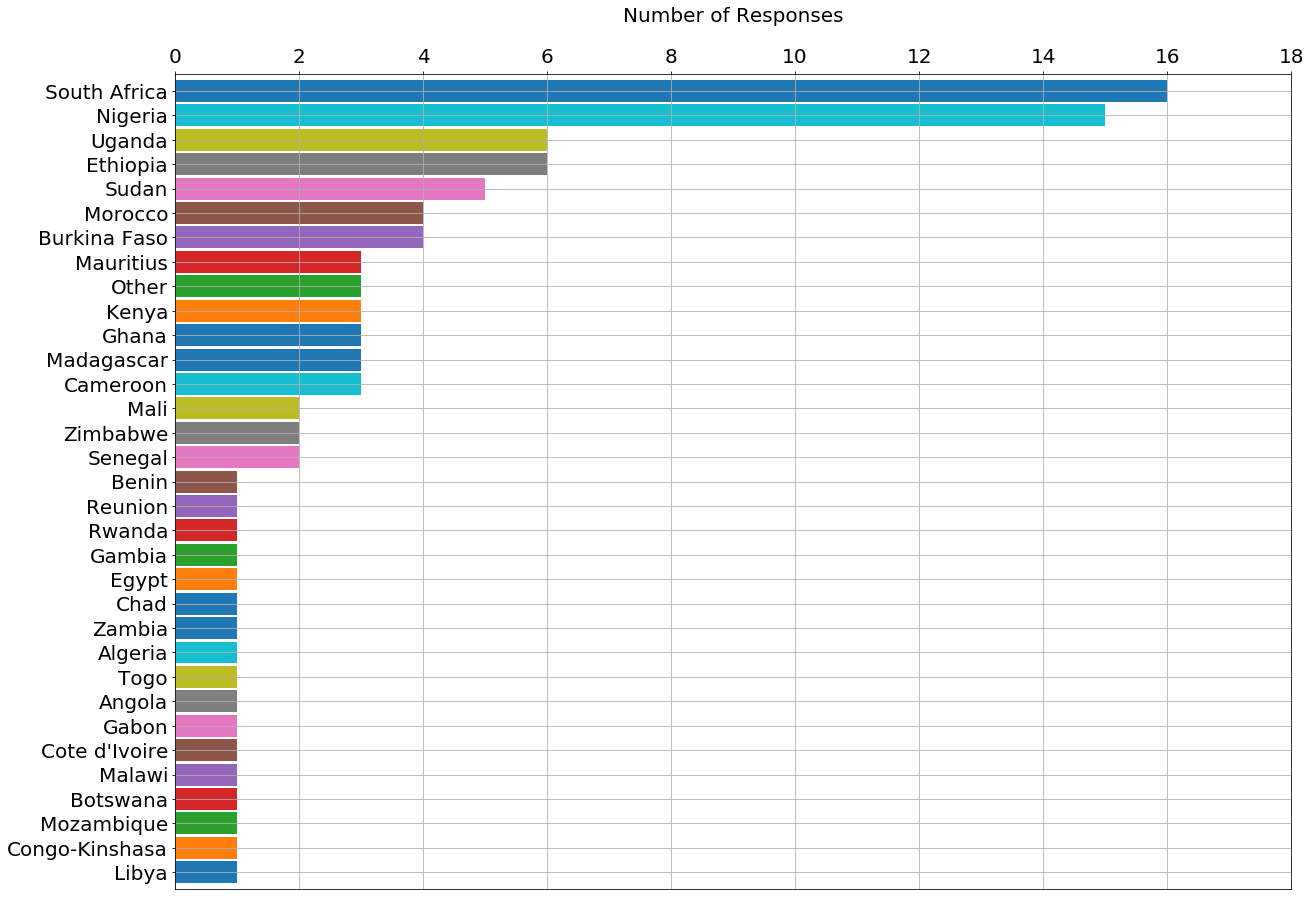

In [190]:
#Number and Percentage of responses per country
def country_responses():
    col1 = df['Country'].value_counts(dropna=False)
    col2 = df['Country'].value_counts(dropna=False, normalize=True)*100
    final = pd.concat([col1, col2], axis=1)
    final.columns = ['Number of Responses', 'Percentage']
    col1 = col1.iloc[::-1] #Reversing the index to have the higher values on top of the bar chart
    ax = col1.plot(kind='barh', figsize=(20,15), width=.9, grid=True)
    ax.set_xlim(0,18,2)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(fontsize=20)
    plt.xlabel("Number of Responses\n", fontsize=20)
    plt.yticks(fontsize=20)
    #plt.legend(fontsize="xx-large")
    plt.show()
    return
country_responses()

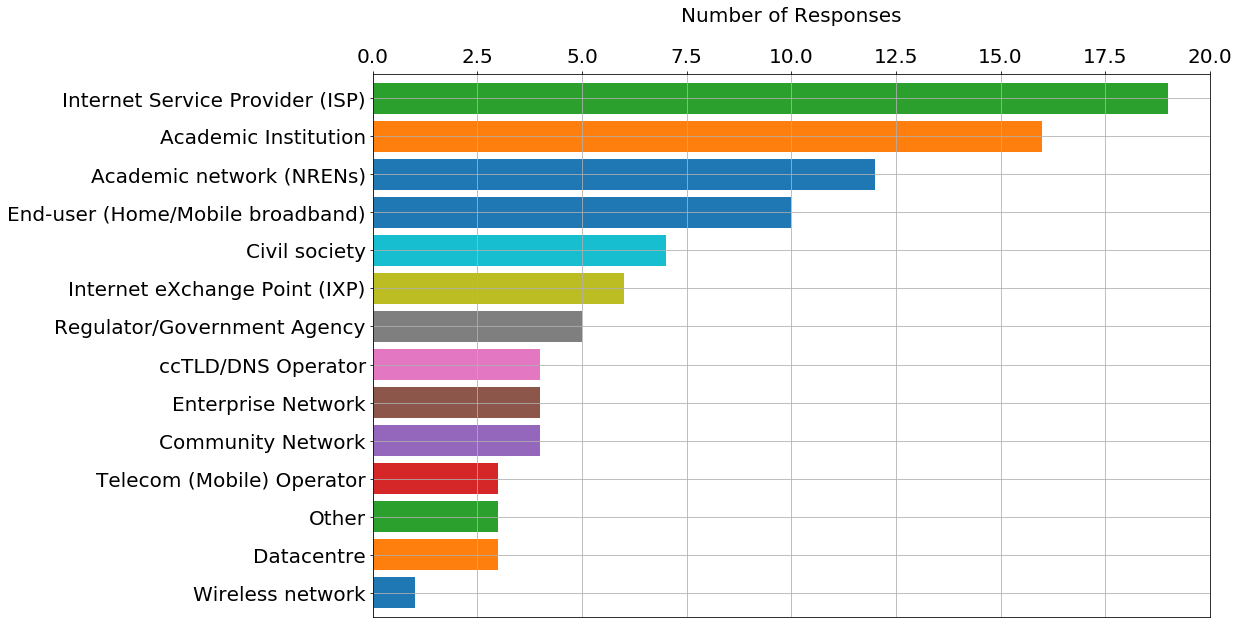

In [191]:
#Number of Responses by Business Category
def business_responses():
    col1 = df['Business Category'].value_counts(dropna=False)
    col2 = df['Business Category'].value_counts(dropna=False, normalize=True)*100
    final = pd.concat([col1, col2], axis=1)
    col1 = col1.iloc[::-1]
    final.columns = ['Number of Responses', 'Percentage']
    ax = col1.plot(kind='barh', figsize=(15,10), width=.8, grid=True)
    ax.set_xlim(0,20,2)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(fontsize=20)
    plt.xlabel("Number of Responses\n", fontsize=20)
    plt.yticks(fontsize=20)
    #plt.legend(fontsize="xx-large")
    plt.show()
    return
business_responses()



Type 'Yes' or 1 for list of businesses running measurement campaign and 'No' or 0 otherwise.

yes




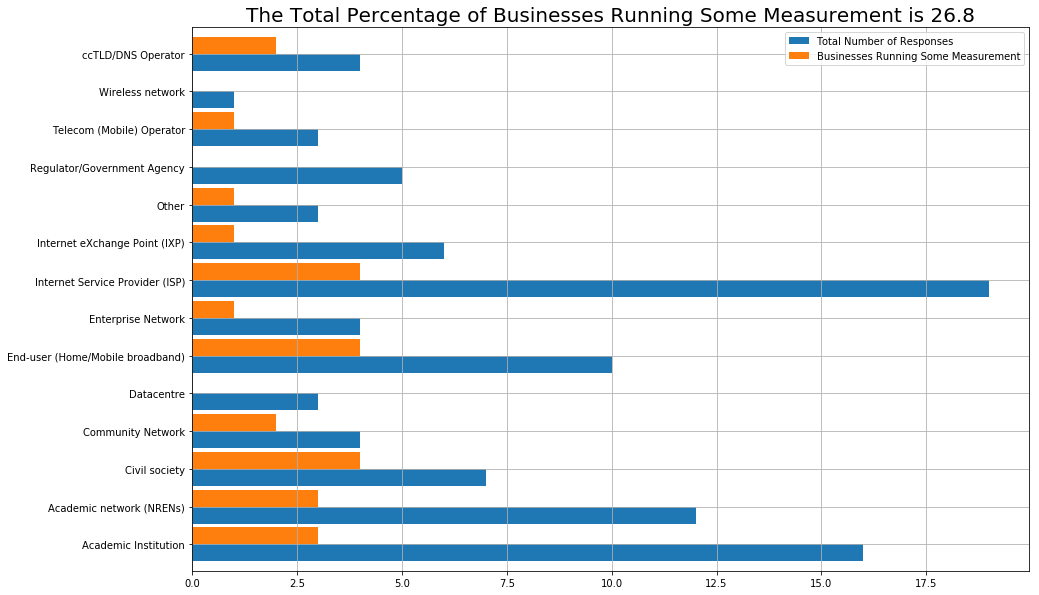

In [192]:
#Whether a business category has run measurements or not
def measurement_campaign():
    coun = df['Business Category'].value_counts(dropna=False)
    
    while True:
        value = input("\n\nType 'Yes' or 1 for list of businesses running measurement campaign and 'No' or 0 otherwise.\n\n")
        if value in ("yes", "Yes", "1"):
            print("\n")
            final = df[['Business Category', 'Campaign Run']][df['Campaign Run']=="Yes"]
            final2 = final.groupby('Business Category').agg({'Campaign Run': 'count'})
            text = "Running Some Measurement"
            break
        if value in ("No", "no", "0"):
            print("\n")
            final = df[['Business Category', 'Campaign Run']][df['Campaign Run']=="No (Go to Question 6)"]
            final2 = (final.groupby('Business Category').agg({'Campaign Run': 'count'})).sort_values('Campaign Run',\
                                                                                                 ascending=False)
            text = "Not Running Any Measurement"
            break
        print("Invalid response.")

    new = pd.concat([coun, final2], axis=1, sort=True)
    new.columns = ['Total Number of Responses', 'Businesses ' + text]
    percentage = round((new.T.iloc[1].sum()/new['Total Number of Responses'].sum())*100, 2)
    ax = new.plot(kind='barh', figsize=(15,10), legend=True, width=.9, grid=True)
    
    ax.set_title("The Total Percentage of Businesses " + text + " is " + str(percentage), fontsize = 20)
    plt.show()
    return 
   
measurement_campaign()

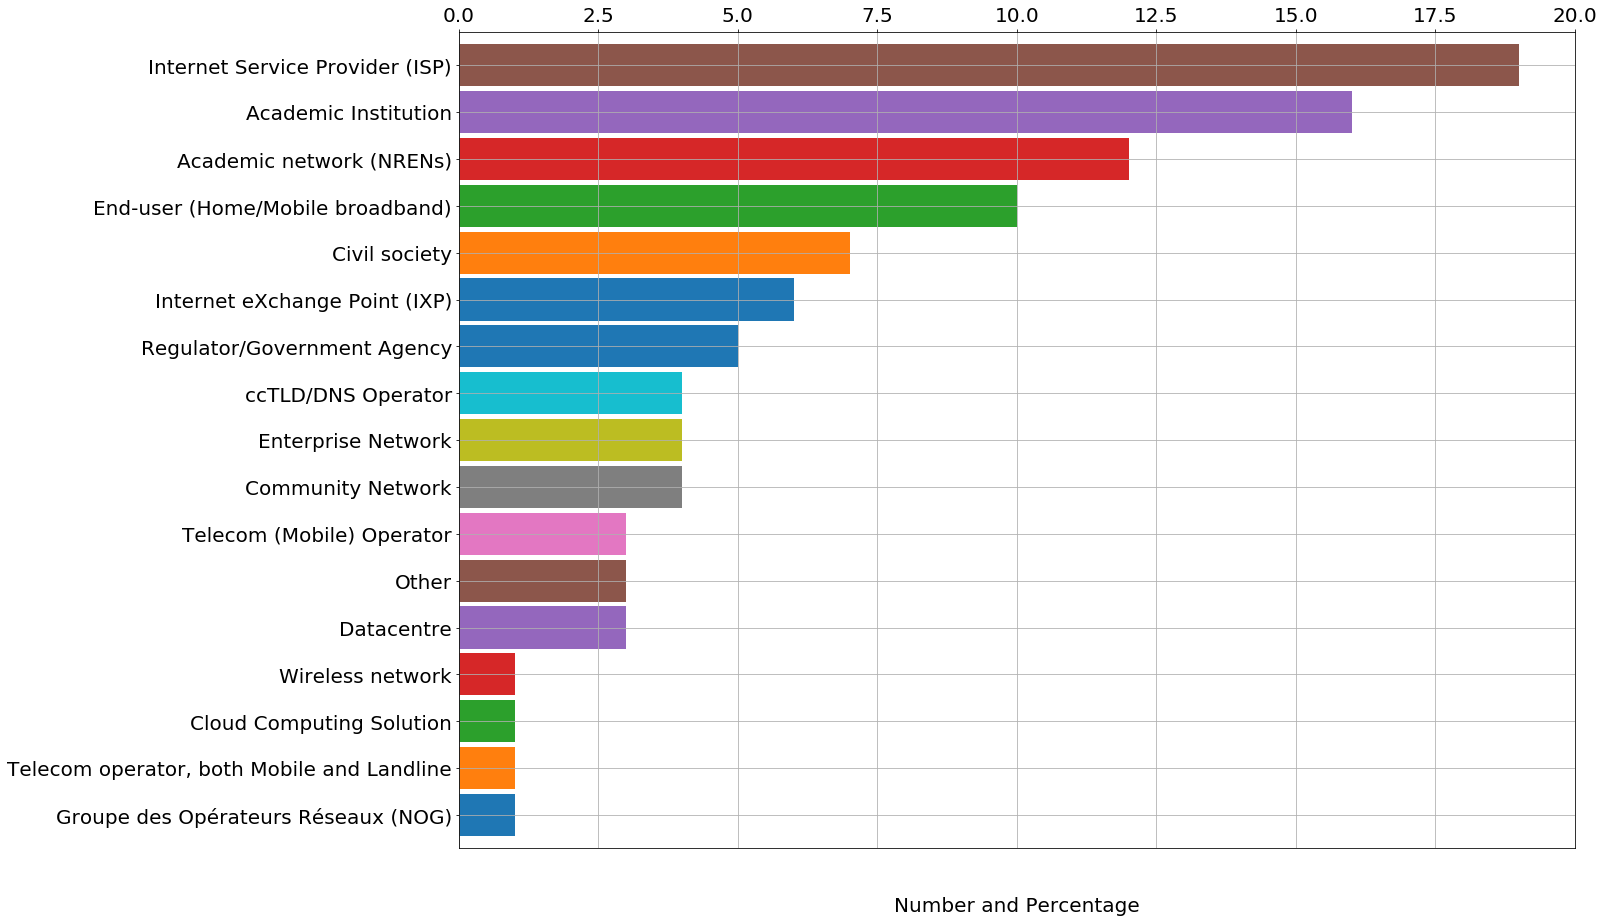

In [193]:
#Number of Responses by Business Category
def network_responses():
    col1 = df['Business Category'].value_counts()
    other = df['Business Category - Other'].value_counts()
    new = pd.concat([col1, other], axis=0)
    new = new.iloc[::-1] #List index from bottom-up
    ax = new.plot(kind='barh', figsize=(20,15), legend=False, width=.9, grid=True)
    ax.set_xlim(0,20,2)
    ax.xaxis.tick_top()
    plt.xticks(fontsize=20)
    plt.xlabel("\n\nNumber and Percentage", fontsize=20)
    plt.yticks(fontsize=20)
    #plt.legend(fontsize="xx-large")
    plt.show()
    return
network_responses()

In [200]:
#Further Information from businesses that run campaign(s)
def campaign_info():
    df2 = df.set_index('Business Category')
    df3 = df2[types_of_network]
    while True:
        input1 = input("To read further info supplied by respondents about their measurement campaign, choose a value between 0 and 23 and hit Enter or leave blank to have all 25 responses displayed.\n\n\n\n")
        if (input1.isdigit()):
            value = int(input1)
            if value in range(0, 24):
                text = tuple(list(df2[['5._Please_provide_more_information.']].dropna().values[value]))[0]
                print(text)
                return df3.loc[df3['5._Please_provide_more_information.'] == text]
                break
            else:
                print("Enter values between 0 and 24. \n\n\n\n")
        elif input1 == "":
            return df3.loc[df3['Campaign Run']== "Yes"]
campaign_info()

To read further info supplied by respondents about their measurement campaign, choose a value between 0 and 25 and hit Enter or leave blank to have all 25 responses displayed.



4
I'm hosting RIPE ATLAS and Anchor at Orange Burkina Faso. I'm also RIPE ATLAS ambassador and i provide some probe in Burkina .


,Country,Business Category - Other,Campaign Run,5._Please_provide_more_information.,3._What_type_of_network_are_you_operating?_[FTTX],3._What_type_of_network_are_you_operating?_[ADSL],"3._What_type_of_network_are_you_operating?_[Mobile_(2G,_3G,_LTE,_LTE-A)]","3._What_type_of_network_are_you_operating?_[Wireless_network_(WIFI,_Wimax)]",3._What_type_of_network_are_you_operating?_[IP_Transit_Services/Wholesale],3._What_type_of_network_are_you_operating?_[Community_network_(Mesh_network)],3._What_type_of_network_are_you_operating?_[Local_Area_Network],3._What_type_of_network_are_you_operating?_[N/A],3._What_type_of_network_are_you_operating?_[Other]
Business Category,,,,,,,,,,,,,
Telecom (Mobile) Operator,Burkina Faso,NaN,Yes,I'm hosting RIPE ATLAS and Anchor at Orange Bu...,No,No,Yes,Yes,Yes,No,Yes,No,NaN


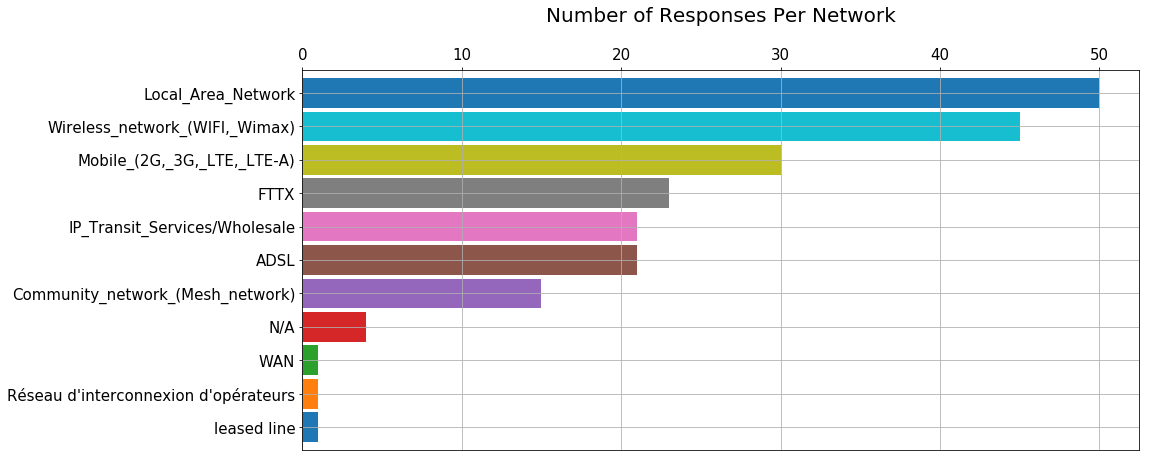

In [202]:
#Number of Networks Operated
def country():
    #col1 = df['Business Category'].value_counts(dropna=False)
    df1 = df[types_of_network]
    freq = []
    network = []
    number = 4
    for col in df1.columns[number:]:
        if col == "3._What_type_of_network_are_you_operating?_[Other]":
            new_network = tuple(df1[col].dropna().unique())
            for net in new_network:
                freq.append(1)
                network.append(net)
        else:
            value = len(df1[df1[col]=="Yes"])
            freq.append(value)
            ntype = col.split('[')[1].split(']')[0]
            network.append(ntype)
    values = zip(network, freq)
    final = list(set(values))
    #print(values
    new_df = pd.DataFrame(final, columns=['Network', 'Number of Responses']).sort_values(by=['Number of Responses'])
    #new_df = new_df.sort_values('Number of Responses', inplace=True)
    ax = new_df.plot(x='Network', y='Number of Responses', kind='barh', figsize=(15,7), legend=False, width=.89, grid=True)
    #ax.set_xlim(0,18,2)
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    plt.xticks(fontsize=15)
    plt.xlabel("Number of Responses Per Network\n", fontsize=20)
    plt.yticks(fontsize=15)
    plt.ylabel("")
    #plt.legend(fontsize="xx-large")
    plt.show()
    return 
 
country()

In [69]:
Personally I would be interested in knowing:

Distribution of responses by country (bar plot)
Distribution of responses by network type (bar plot)
Distribution of responses by business category (bar plot)
Which business category/network type has ever run a measurement campaign, and for what reasons?
Distribution of reason for running measurement campaign by network type/business category? i.e. by business category, which is the most popular purpose of measurement
Most important metrics categorised by network type/business category
Tools used and their categorisation by business category
and so on...

SyntaxError: invalid syntax (<ipython-input-69-06a538d8dbae>, line 1)

In [163]:
#Reasons for running measurement
def reasons_for_measurement():
    reasons =['6._Please_state_your_main_purpose_for_running_network_measurements?_[Network_monitoring]',
              '6._Please_state_your_main_purpose_for_running_network_measurements?_[Quality_of_Service_(QoS)/Quality_of_Experience_(QoE)]',
              '6._Please_state_your_main_purpose_for_running_network_measurements?_[Research]',
              '6._Please_state_your_main_purpose_for_running_network_measurements?_[Censorship_Measurement]',
              "6._Please_state_your_main_purpose_for_running_network_measurements?_[I_don't_run_any_measurement]",
              '6._Please_state_your_main_purpose_for_running_network_measurements?_[Other]']
    df2 = df[reasons]
    freq = []
    purpose = []
    for col in df2.columns:
        if col == "6._Please_state_your_main_purpose_for_running_network_measurements?_[Other]":
            new_purpose = tuple(df2[col].dropna().unique())
            for purp in new_purpose:
                freq.append(1)
                purpose.append(purp)
        else:
            value = len(df2[df2[col]=="Yes"])
            freq.append(value)
            ntype = col.split('[')[1].split(']')[0]
            purpose.append(ntype)
    values = zip(purpose, freq)
    final = list(set(values))
    print("Only 13 respondents here claimed to not run any measurement in contrast to the earlier results\
that showed that 73.2% of the respondents said they are not running any measurement. It is likely\
that some of the respondents that earlier responded not have run any measurement before are \
speculating what they will use a measurement platform for rather than what they have actually used the\
platform for. Hence the reason for fewer answers under 'I_don't_run_any_measurement' column")
    return final
reasons_for_measurement()

Only 13 respondents claimed to not run any measurement in contrast to the earlier resultsthat showed that 73.2% of the respondents said they are not running any measurement. It is likelythat some of the respondents that earlier responded not have run any measurement before are speculating what they will use a measurement platform for rather than what they have actually used theplatform for. Hence the reason for fewer answers under 'I_don't_run_any_measurement' column


[('Censorship_Measurement', 10),
 ('Research', 42),
 ("I_don't_run_any_measurement", 13),
 ('knowledge fun', 1),
 ('Quality_of_Service_(QoS)/Quality_of_Experience_(QoE)', 64),
 ('Network_monitoring', 68),
 ('education', 1),
 ('Focused group discussion', 1),
 ('So I can tell my ISP whe my internet is slow', 1)]